<a href="https://colab.research.google.com/github/epochee/-election-prediction/blob/main/%EB%8C%80%ED%86%B5%EB%A0%B9%EC%84%A0%EA%B1%B0_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

In [ ]:
#17년도 개표자료 나눠져있어서 다 불러온뒤 합칠 예정
df1 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/01_17대선_투표구별개표자료_서울.xls')
df2 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/02_17대선_투표구별개표자료_부산.xls')
df3 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/03_17대선_투표구별개표자료_대구.xls')
df4 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/04_17대선_투표구별개표자료_인천.xls')
df5 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/05_17대선_투표구별개표자료_광주.xls')
df6 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/06_17대선_투표구별개표자료_대전.xls')
df7 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/07_17대선_투표구별개표자료_울산.xls')
df8 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/08_17대선_투표구별개표자료_경기.xls')
df9 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/09_17대선_투표구별개표자료_강원.xls')
df10 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/10_17대선_투표구별개표자료_충북.xls')
df11 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/11_17대선_투표구별개표자료_충남.xls')
df12 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/12_17대선_투표구별개표자료_전북.xls')
df13 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/13_17대선_투표구별개표자료_전남.xls')
df14 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/14_17대선_투표구별개표자료_경북.xls')
df15 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/15_17대선_투표구별개표자료_경남.xls')
df16 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제17대 대통령선거 개표자료/16_17대선_투표구별개표자료_제주.xls')
#18년도 개표자료
df_18 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제18대 대통령선거 개표자료.xls')
#19년도 개표자료
df_19 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제19대 대통령선거 개표자료.xlsx')

In [ ]:
###############17년도 자료#################

In [ ]:
df1['시도명'] = '서울특별시'
df2['시도명'] = '부산광역시'
df3['시도명'] = '대구광역시'
df4['시도명'] = '인천광역시'
df5['시도명'] = '광주광역시'
df6['시도명'] = '대전광역시'
df7['시도명'] = '울산광역시'
df8['시도명'] = '경기도'
df9['시도명'] = '강원도'
df10['시도명'] = '충청북도'
df11['시도명'] = '충청남도'
df12['시도명'] = '전라북도'
df13['시도명'] = '전라남도'
df14['시도명'] = '경상북도'
df15['시도명'] = '경상남도'
df16['시도명'] = '제주특별자치도'
df_17 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16])
df_17.rename(columns={'후보자별 득표상황':'기호1번','Unnamed: 7':'기호2번','Unnamed: 15':'기호3번'},inplace=True)
df_17.dropna(inplace=True)
df_17.drop(columns=['투표용지\n교부수','Unnamed: 8',	'Unnamed: 9',	'Unnamed: 10',	'Unnamed: 11',
                    'Unnamed: 12',	'Unnamed: 13',	'Unnamed: 14','Unnamed: 16','무효\n투표수','기권수','투표구명','투표수'],inplace = True)
df_17_ = pd.melt(df_17, id_vars=	['시도명','구시군명',	'읍면동명',	'선거인수'], value_vars=['기호1번','기호2번','기호3번'])
df_17_.rename(columns={'variable':'대선후보','value':'투표수'},inplace=True)

In [ ]:
n20_1 = df_17_.copy()
n30_1 = df_17_.copy()
n40_1 = df_17_.copy()
n50_1 = df_17_.copy()
n20_2 = df_17_.copy()
n30_2 = df_17_.copy()
n40_2 = df_17_.copy()
n50_2 = df_17_.copy()
n20_3 = df_17_.copy()
n30_3 = df_17_.copy()
n40_3 = df_17_.copy()
n50_3 = df_17_.copy()

In [ ]:
n20_1['투표수'] = n20_1.loc[n20_1['대선후보']=='기호1번']['투표수']*11.12/100         ##나이별 선거인수와 투표수 분리
n20_1['선거인수'] = n20_1['선거인수']*20.9/100
n20_1['나이'] = 20
n30_1['투표수'] = n30_1.loc[n30_1['대선후보']=='기호1번']['투표수']*22.7/100
n30_1['선거인수'] = n30_1['선거인수']*22.7/100
n30_1['나이'] = 30
n40_1['투표수'] = n40_1.loc[n40_1['대선후보']=='기호1번']['투표수']*28.6/100
n40_1['선거인수'] = n40_1['선거인수']*22.5/100
n40_1['나이'] = 40
n50_1['투표수'] = n50_1.loc[n50_1['대선후보']=='기호1번']['투표수']*37.5/100
n50_1['선거인수'] = n50_1['선거인수']*33.7/100
n50_1['나이'] = 50


n20_2['투표수'] = n20_2.loc[n20_2['대선후보']=='기호2번']['투표수']*11.6/100
n20_2['선거인수'] = n20_2['선거인수']*20.9/100
n20_2['나이'] = 20
n30_2['투표수'] = n30_2.loc[n30_2['대선후보']=='기호2번']['투표수']*15.9/100
n30_2['선거인수'] = n30_2['선거인수']*22.7/100
n30_2['나이'] = 30
n40_2['투표수'] = n40_2.loc[n40_2['대선후보']=='기호2번']['투표수']*24.9/100
n40_2['선거인수'] = n40_2['선거인수']*22.5/100
n40_2['나이'] = 40
n50_2['투표수'] = n50_2.loc[n50_2['대선후보']=='기호2번']['투표수']*47.5/100
n50_2['선거인수'] = n50_2['선거인수']*33.7/100
n50_2['나이'] = 50


n20_3['투표수'] = n20_3.loc[n20_3['대선후보']=='기호3번']['투표수']*17.3/100
n20_3['선거인수'] = n20_3['선거인수']*20.9/100
n20_3['나이'] = 20
n30_3['투표수'] = n30_3.loc[n30_3['대선후보']=='기호3번']['투표수']*24/100
n30_3['선거인수'] = n30_3['선거인수']*22.7/100
n30_3['나이'] = 30
n40_3['투표수'] = n40_3.loc[n40_3['대선후보']=='기호3번']['투표수']*22/100
n40_3['선거인수'] = n40_3['선거인수']*22.5/100
n40_3['나이'] = 40
n50_3['투표수'] = n50_3.loc[n50_3['대선후보']=='기호3번']['투표수']*36/100
n50_3['선거인수'] = n50_3['선거인수']*33.7/100
n50_3['나이'] = 50


df_17_e1 = pd.concat([n20_1,n30_1,n40_1,n50_1])
df_17_e1.dropna(inplace=True)
df_17_e2 = pd.concat([n20_2,n30_2,n40_2,n50_2])
df_17_e2.dropna(inplace=True)
df_17_e3 = pd.concat([n20_3,n30_3,n40_3,n50_3])
df_17_e3.dropna(inplace=True)


df_17_en = pd.concat([df_17_e1,df_17_e2,df_17_e3])


df_17_en1 = df_17_en.loc[df_17_en['대선후보'] == '기호1번']        ### 정당지지도 추가
df_17_en1['정당지지도'] = 11.9
df_17_en1['대선후보 선호도'] = 26.1
df_17_en1.dropna(inplace=True)

df_17_en2 = df_17_en.loc[df_17_en['대선후보'] == '기호2번']
df_17_en2['정당지지도'] = 42.1
df_17_en2['대선후보 선호도'] = 48.7
df_17_en2.dropna(inplace=True)

df_17_en3 = df_17_en.loc[df_17_en['대선후보'] == '기호3번']
df_17_en3['정당지지도'] = 5
df_17_en3['대선후보 선호도'] = 15.1
df_17_en3.dropna(inplace=True)

df_17_end = pd.concat([df_17_en1,df_17_en2,df_17_en3])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [ ]:
df_17_end

,시도명,구시군명,읍면동명,선거인수,대선후보,투표수,나이,정당지지도,대선후보 선호도
0,서울특별시,종로구,청운동,702.240,기호1번,60.1592,20,11.9,26.1
1,서울특별시,종로구,효자동,1937.848,기호1번,175.251,20,11.9,26.1
2,서울특별시,종로구,사직동,1398.419,기호1번,105.418,20,11.9,26.1
3,서울특별시,종로구,삼청동,657.932,기호1번,47.3712,20,11.9,26.1
4,서울특별시,종로구,부암동,1889.987,기호1번,130.326,20,11.9,26.1
...,...,...,...,...,...,...,...,...,...
10723,제주특별자치도,서귀포시,대정읍,4428.180,기호3번,401.04,50,5.0,15.1
10724,제주특별자치도,서귀포시,남원읍,4781.356,기호3번,418.32,50,5.0,15.1
10725,제주특별자치도,서귀포시,성산읍,3749.462,기호3번,347.4,50,5.0,15.1
10726,제주특별자치도,서귀포시,안덕면,2565.244,기호3번,244.8,50,5.0,15.1


In [ ]:
###################################18년도 자료 처리###############################################

In [ ]:
df_18 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제18대 대통령선거 개표자료.xls')

In [ ]:
df_18.head(5)

,시도명,구시군명,읍면동명,투표구명,선거인수,투표수,새누리당\n박근혜,민주통합당\n문재인,무소속\n박종선,무소속\n김소연,무소속\n강지원,무소속\n김순자,계,무효\n투표수,기권수
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,전국,합계,NaN,NaN,40507842.0,30721459.0,15773128.0,14692632.0,12854.0,16687.0,53303.0,46017.0,30594621.0,126838.0,9786383.0
2,서울특별시,합계,NaN,NaN,8393847.0,6307869.0,3024572.0,3227639.0,3559.0,3793.0,11829.0,5307.0,6276699.0,31170.0,2085978.0
3,서울특별시,종로구,소계,NaN,141447.0,103189.0,49422.0,52747.0,73.0,86.0,211.0,97.0,102636.0,553.0,38258.0
4,서울특별시,종로구,재외투표,NaN,2138.0,1626.0,798.0,807.0,1.0,0.0,5.0,6.0,1617.0,9.0,512.0


In [ ]:
df_18.dropna(inplace=True)
df_18.drop(columns=['투표구명','무소속\n박종선','무소속\n김소연','무소속\n김순자','계','무효\n투표수','기권수','투표수'],inplace = True)
df_18.rename(columns={'새누리당\n박근혜':'기호1번','민주통합당\n문재인':'기호2번','무소속\n강지원':'기호3번'},inplace=True)
df_18_ = pd.melt(df_18, id_vars=['시도명','구시군명',	'읍면동명',	'선거인수'], value_vars=['기호1번','기호2번','기호3번'])
df_18_.rename(columns={'variable':'대선후보','value':'투표수'},inplace=True)

In [ ]:
n20_1 = df_18_.copy()
n30_1 = df_18_.copy()
n40_1 = df_18_.copy()
n50_1 = df_18_.copy()
n20_2 = df_18_.copy()
n30_2 = df_18_.copy()
n40_2 = df_18_.copy()
n50_2 = df_18_.copy()
n20_3 = df_18_.copy()
n30_3 = df_18_.copy()
n40_3 = df_18_.copy()
n50_3 = df_18_.copy()

In [ ]:
n20_1['투표수'] = n20_1.loc[n20_1['대선후보']=='기호1번']['투표수']*9.4/100         ##나이별 선거인수와 투표수 분리
n20_1['선거인수'] = n20_1['선거인수']*17.9/100
n20_1['나이'] = 20
n30_1['투표수'] = n30_1.loc[n30_1['대선후보']=='기호1번']['투표수']*11.0/100
n30_1['선거인수'] = n30_1['선거인수']*20.0/100
n30_1['나이'] = 30
n40_1['투표수'] = n40_1.loc[n40_1['대선후보']=='기호1번']['투표수']*19.9/100
n40_1['선거인수'] = n40_1['선거인수']*21.8/100
n40_1['나이'] = 40
n50_1['투표수'] = n50_1.loc[n50_1['대선후보']=='기호1번']['투표수']*59.6/100
n50_1['선거인수'] = n50_1['선거인수']*40.3/100
n50_1['나이'] = 50


n20_2['투표수'] = n20_2.loc[n20_2['대선후보']=='기호2번']['투표수']*19.5/100
n20_2['선거인수'] = n20_2['선거인수']*17.9/100
n20_2['나이'] = 20
n30_2['투표수'] = n30_2.loc[n30_2['대선후보']=='기호2번']['투표수']*28.05/100
n30_2['선거인수'] = n30_2['선거인수']*20.0/100
n30_2['나이'] = 30
n40_2['투표수'] = n40_2.loc[n40_2['대선후보']=='기호2번']['투표수']*26.19/100
n40_2['선거인수'] = n40_2['선거인수']*21.8/100
n40_2['나이'] = 40
n50_2['투표수'] = n50_2.loc[n50_2['대선후보']=='기호2번']['투표수']*26.45/100
n50_2['선거인수'] = n50_2['선거인수']*40.3/100
n50_2['나이'] = 50


n20_3['투표수'] = n20_3.loc[n20_3['대선후보']=='기호3번']['투표수']*27.5/100
n20_3['선거인수'] = n20_3['선거인수']*17.9/100
n20_3['나이'] = 20
n30_3['투표수'] = n30_3.loc[n30_3['대선후보']=='기호3번']['투표수']*32.72/100
n30_3['선거인수'] = n30_3['선거인수']*20.0/100
n30_3['나이'] = 30
n40_3['투표수'] = n40_3.loc[n40_3['대선후보']=='기호3번']['투표수']*10.07/100
n40_3['선거인수'] = n40_3['선거인수']*21.8/100
n40_3['나이'] = 40
n50_3['투표수'] = n50_3.loc[n50_3['대선후보']=='기호3번']['투표수']*29.48/100
n50_3['선거인수'] = n50_3['선거인수']*40.3/100
n50_3['나이'] = 50


df_18_e1 = pd.concat([n20_1,n30_1,n40_1,n50_1])
df_18_e1.dropna(inplace=True)
df_18_e2 = pd.concat([n20_2,n30_2,n40_2,n50_2])
df_18_e2.dropna(inplace=True)
df_18_e3 = pd.concat([n20_3,n30_3,n40_3,n50_3])
df_18_e3.dropna(inplace=True)


df_18_en = pd.concat([df_18_e1,df_18_e2,df_18_e3])


In [ ]:
df_18_en['시도명'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
####################서울#####################
df_18_en1_s = df_18_en.loc[(df_18_en['대선후보'] == '기호1번')&(df_18_en['시도명'] == '서울특별시')]        ### 정당지지도 추가
df_18_en1_s['정당지지도'] = 42
df_18_en1_s['대선후보 선호도'] =45.5
df_18_en1_s.dropna(inplace=True)

df_18_en2_s = df_18_en.loc[(df_18_en['대선후보'] == '기호2번')&(df_18_en['시도명'] == '서울특별시')]
df_18_en2_s['정당지지도'] = 31
df_18_en2_s['대선후보 선호도'] = 54.2
df_18_en2_s.dropna(inplace=True)

df_18_en3_s = df_18_en.loc[(df_18_en['대선후보'] == '기호3번')&(df_18_en['시도명'] == '서울특별시')]
df_18_en3_s['정당지지도'] = 3
df_18_en3_s['대선후보 선호도'] = 0.2
df_18_en3_s.dropna(inplace=True)
#################인천 경기####################
df_18_en1_i = df_18_en.loc[(df_18_en['대선후보'] == '기호1번')&((df_18_en['시도명'] == '인천광역시')|(df_18_en['시도명'] == '경기도'))]        ### 정당지지도 추가
df_18_en1_i['정당지지도'] = 38
df_18_en1_i['대선후보 선호도'] = 48.1
df_18_en1_i.dropna(inplace=True)

df_18_en2_i = df_18_en.loc[(df_18_en['대선후보'] == '기호2번')&((df_18_en['시도명'] == '인천광역시')|(df_18_en['시도명'] == '경기도'))]
df_18_en2_i['정당지지도'] = 31
df_18_en2_i['대선후보 선호도'] = 51.4
df_18_en2_i.dropna(inplace=True)

df_18_en3_i = df_18_en.loc[(df_18_en['대선후보'] == '기호3번')&((df_18_en['시도명'] == '인천광역시')|(df_18_en['시도명'] == '경기도'))]
df_18_en3_i['정당지지도'] = 3
df_18_en3_i['대선후보 선호도'] = 0.4
df_18_en3_i.dropna(inplace=True)
################광주 전라#####################
df_18_en1_gj = df_18_en.loc[(df_18_en['대선후보'] == '기호1번')&((df_18_en['시도명'] == '광주광역시')|(df_18_en['시도명'] == '전라북도')|(df_18_en['시도명'] == '전라남도'))]        ### 정당지지도 추가
df_18_en1_gj['정당지지도'] = 6
df_18_en1_gj['대선후보 선호도'] = 12.3
df_18_en1_gj.dropna(inplace=True)

df_18_en2_gj = df_18_en.loc[(df_18_en['대선후보'] == '기호2번')&((df_18_en['시도명'] == '광주광역시')|(df_18_en['시도명'] == '전라북도')|(df_18_en['시도명'] == '전라남도'))]
df_18_en2_gj['정당지지도'] = 58
df_18_en2_gj['대선후보 선호도'] = 87.2
df_18_en2_gj.dropna(inplace=True)

df_18_en3_gj = df_18_en.loc[(df_18_en['대선후보'] == '기호3번')&((df_18_en['시도명'] == '광주광역시')|(df_18_en['시도명'] == '전라북도')|(df_18_en['시도명'] == '전라남도'))]
df_18_en3_gj['정당지지도'] = 8
df_18_en3_gj['대선후보 선호도'] = 0.5
df_18_en3_gj.dropna(inplace=True)
################강원#####################
df_18_en1_g = df_18_en.loc[(df_18_en['대선후보'] == '기호1번')&((df_18_en['시도명'] == '강원도'))]        ### 정당지지도 추가
df_18_en1_g['정당지지도'] = 41
df_18_en1_g['대선후보 선호도'] = 61.9
df_18_en1_g.dropna(inplace=True)

df_18_en2_g = df_18_en.loc[(df_18_en['대선후보'] == '기호2번')&((df_18_en['시도명'] == '강원도'))]
df_18_en2_g['정당지지도'] = 25
df_18_en2_g['대선후보 선호도'] = 38.1
df_18_en2_g.dropna(inplace=True)

df_18_en3_g = df_18_en.loc[(df_18_en['대선후보'] == '기호3번')&((df_18_en['시도명'] == '강원도'))]
df_18_en3_g['정당지지도'] = 6
df_18_en3_g['대선후보 선호도'] = 0.01
df_18_en3_g.dropna(inplace=True)
################대전 세종 충청#####################
df_18_en1_d = df_18_en.loc[(df_18_en['대선후보'] == '기호1번')&((df_18_en['시도명'] == '대전광역시')|(df_18_en['시도명'] == '충청북도')|(df_18_en['시도명'] == '충청남도')|(df_18_en['시도명'] == '세종특별자치시'))]        ### 정당지지도 추가
df_18_en1_d['정당지지도'] = 43
df_18_en1_d['대선후보 선호도'] = 51.0
df_18_en1_d.dropna(inplace=True)

df_18_en2_d = df_18_en.loc[(df_18_en['대선후보'] == '기호2번')&((df_18_en['시도명'] == '대전광역시')|(df_18_en['시도명'] == '충청북도')|(df_18_en['시도명'] == '충청남도')|(df_18_en['시도명'] == '세종특별자치시'))]
df_18_en2_d['정당지지도'] = 30
df_18_en2_d['대선후보 선호도'] = 48.8
df_18_en2_d.dropna(inplace=True)

df_18_en3_d = df_18_en.loc[(df_18_en['대선후보'] == '기호3번')&((df_18_en['시도명'] == '대전광역시')|(df_18_en['시도명'] == '충청북도')|(df_18_en['시도명'] == '충청남도')|(df_18_en['시도명'] == '세종특별자치시'))]
df_18_en3_d['정당지지도'] = 2
df_18_en3_d['대선후보 선호도'] = 0.2
df_18_en3_d.dropna(inplace=True)
################부산 울산 경남#####################
df_18_en1_b = df_18_en.loc[(df_18_en['대선후보'] == '기호1번')&((df_18_en['시도명'] == '부산광역시')|(df_18_en['시도명'] == '울산광역시')|(df_18_en['시도명'] == '경상남도'))]        ### 정당지지도 추가
df_18_en1_b['정당지지도'] = 50
df_18_en1_b['대선후보 선호도'] = 58.5
df_18_en1_b.dropna(inplace=True)

df_18_en2_b = df_18_en.loc[(df_18_en['대선후보'] == '기호2번')&((df_18_en['시도명'] == '부산광역시')|(df_18_en['시도명'] == '울산광역시')|(df_18_en['시도명'] == '경상남도'))]
df_18_en2_b['정당지지도'] = 24
df_18_en2_b['대선후보 선호도'] = 41.3
df_18_en2_b.dropna(inplace=True)

df_18_en3_b = df_18_en.loc[(df_18_en['대선후보'] == '기호3번')&((df_18_en['시도명'] == '부산광역시')|(df_18_en['시도명'] == '울산광역시')|(df_18_en['시도명'] == '경상남도'))]
df_18_en3_b['정당지지도'] = 3
df_18_en3_b['대선후보 선호도']  = 0.3
df_18_en3_b.dropna(inplace=True)
#################대구 경북####################
df_18_en1_dg = df_18_en.loc[(df_18_en['대선후보'] == '기호1번')&((df_18_en['시도명'] == '대구광역시')|(df_18_en['시도명'] == '경상북도'))]        ### 정당지지도 추가
df_18_en1_dg['정당지지도'] = 58
df_18_en1_dg['대선후보 선호도'] = 83.5
df_18_en1_dg.dropna(inplace=True)

df_18_en2_dg = df_18_en.loc[(df_18_en['대선후보'] == '기호2번')&((df_18_en['시도명'] == '대구광역시')|(df_18_en['시도명'] == '경상북도'))]
df_18_en2_dg['정당지지도'] = 15
df_18_en2_dg['대선후보 선호도'] = 15.6
df_18_en2_dg.dropna(inplace=True)

df_18_en3_dg = df_18_en.loc[(df_18_en['대선후보'] == '기호3번')&((df_18_en['시도명'] == '대구광역시')|(df_18_en['시도명'] == '경상북도'))]
df_18_en3_dg['정당지지도'] = 1
df_18_en3_dg['대선후보 선호도']= 0.9
df_18_en3_dg.dropna(inplace=True)
####################제주#####################
df_18_en1_jj = df_18_en.loc[(df_18_en['대선후보'] == '기호1번')&(df_18_en['시도명'] == '제주특별자치도')]        ### 정당지지도 추가
df_18_en1_jj['정당지지도'] = 40
df_18_en1_jj['대선후보 선호도'] = 50.2
df_18_en1_jj.dropna(inplace=True)

df_18_en2_jj = df_18_en.loc[(df_18_en['대선후보'] == '기호2번')&(df_18_en['시도명'] == '제주특별자치도')]
df_18_en2_jj['정당지지도'] = 49.4
df_18_en2_jj['대선후보 선호도'] = 17
df_18_en2_jj.dropna(inplace=True)

df_18_en3_jj = df_18_en.loc[(df_18_en['대선후보'] == '기호3번')&(df_18_en['시도명'] == '제주특별자치도')]
df_18_en3_jj['정당지지도'] = 0.2
df_18_en3_jj['대선후보 선호도'] = 17
df_18_en3_jj.dropna(inplace=True)


df_18_end = pd.concat([df_18_en1_s,df_18_en2_s,df_18_en3_s,
                       df_18_en1_i,df_18_en2_i,df_18_en3_i,
                       df_18_en1_gj,df_18_en2_gj,df_18_en3_gj,
                       df_18_en1_g,df_18_en2_g,df_18_en3_g,
                       df_18_en1_d,df_18_en2_d,df_18_en3_d,
                       df_18_en1_b,df_18_en2_b,df_18_en3_b,
                       df_18_en1_dg,df_18_en2_dg,df_18_en3_dg,
                       df_18_en1_jj,df_18_en2_jj,df_18_en3_jj])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

In [ ]:
df_18_end

,시도명,구시군명,읍면동명,선거인수,대선후보,투표수,나이,정당지지도,대선후보 선호도
0,서울특별시,종로구,청운효자동,2077.295,기호1번,397.9020,20,42.0,45.5
1,서울특별시,종로구,사직동,1493.218,기호1번,324.1120,20,42.0,45.5
2,서울특별시,종로구,삼청동,495.293,기호1번,103.3060,20,42.0,45.5
3,서울특별시,종로구,부암동,1592.563,기호1번,317.8140,20,42.0,45.5
4,서울특별시,종로구,평창동,2787.925,기호1번,654.0520,20,42.0,45.5
...,...,...,...,...,...,...,...,...,...
10432,제주특별자치도,서귀포시,서홍동,2547.766,기호3번,2.3584,50,0.2,17.0
10433,제주특별자치도,서귀포시,대륜동,2849.210,기호3번,3.5376,50,0.2,17.0
10434,제주특별자치도,서귀포시,대천동,2152.826,기호3번,2.6532,50,0.2,17.0
10435,제주특별자치도,서귀포시,중문동,2681.965,기호3번,4.4220,50,0.2,17.0


In [ ]:
##################################19년도 데이터 처리##############

In [ ]:
df_19 = pd.read_excel('/content/drive/MyDrive/프로젝트2/제19대 대통령선거 개표자료.xlsx')

In [ ]:
df_19.rename(columns={'후보자별 득표수':'기호1번','Unnamed: 7':'기호2번','Unnamed: 8':'기호3번'},inplace=True)
df_19 = df_19.loc[df_19['투표구명']=='합계']
df_19.drop(columns=['Unnamed: 16',	'Unnamed: 9',	'Unnamed: 10',	'Unnamed: 11',
                    'Unnamed: 12',	'Unnamed: 13',	'Unnamed: 14','Unnamed: 15',	'Unnamed: 17',	'Unnamed: 18',	'Unnamed: 19','무효투표수','기권수','투표구명','투표수'],inplace = True)
df_19_ = pd.melt(df_19, id_vars=	['시도명','구시군명',	'읍면동명',	'선거인수'], value_vars=['기호1번','기호2번','기호3번'])
df_19_.rename(columns={'variable':'대선후보','value':'투표수'},inplace=True)

In [ ]:
n20_1 = df_19_.copy()
n30_1 = df_19_.copy()
n40_1 = df_19_.copy()
n50_1 = df_19_.copy()
n20_2 = df_19_.copy()
n30_2 = df_19_.copy()
n40_2 = df_19_.copy()
n50_2 = df_19_.copy()
n20_3 = df_19_.copy()
n30_3 = df_19_.copy()
n40_3 = df_19_.copy()
n50_3 = df_19_.copy()

In [ ]:
n20_1['투표수'] = n20_1.loc[n20_1['대선후보']=='기호1번']['투표수']*17.05/100         ##나이별 선거인수와 투표수 분리
n20_1['선거인수'] = n20_1['선거인수']*17.9/100
n20_1['나이'] = 20
n30_1['투표수'] = n30_1.loc[n30_1['대선후보']=='기호1번']['투표수']*23.8/100
n30_1['선거인수'] = n30_1['선거인수']*20.0/100
n30_1['나이'] = 30
n40_1['투표수'] = n40_1.loc[n40_1['대선후보']=='기호1번']['투표수']*26.25/100
n40_1['선거인수'] = n40_1['선거인수']*21.8/100
n40_1['나이'] = 40
n50_1['투표수'] = n50_1.loc[n50_1['대선후보']=='기호1번']['투표수']*27.79/100
n50_1['선거인수'] = n50_1['선거인수']*40.3/100
n50_1['나이'] = 50


n20_2['투표수'] = n20_2.loc[n20_2['대선후보']=='기호2번']['투표수']*8.2/100
n20_2['선거인수'] = n20_2['선거인수']*17.9/100
n20_2['나이'] = 20
n30_2['투표수'] = n30_2.loc[n30_2['대선후보']=='기호2번']['투표수']*9.3/100
n30_2['선거인수'] = n30_2['선거인수']*20.0/100
n30_2['나이'] = 30
n40_2['투표수'] = n40_2.loc[n40_2['대선후보']=='기호2번']['투표수']*10.9/100
n40_2['선거인수'] = n40_2['선거인수']*21.8/100
n40_2['나이'] = 40
n50_2['투표수'] = n50_2.loc[n50_2['대선후보']=='기호2번']['투표수']*74/100
n50_2['선거인수'] = n50_2['선거인수']*40.3/100
n50_2['나이'] = 50


n20_3['투표수'] = n20_3.loc[n20_3['대선후보']=='기호3번']['투표수']*13.37/100
n20_3['선거인수'] = n20_3['선거인수']*17.9/100
n20_3['나이'] = 20
n30_3['투표수'] = n30_3.loc[n30_3['대선후보']=='기호3번']['투표수']*15.56/100
n30_3['선거인수'] = n30_3['선거인수']*20.0/100
n30_3['나이'] = 30
n40_3['투표수'] = n40_3.loc[n40_3['대선후보']=='기호3번']['투표수']*19.38/100
n40_3['선거인수'] = n40_3['선거인수']*21.8/100
n40_3['나이'] = 40
n50_3['투표수'] = n50_3.loc[n50_3['대선후보']=='기호3번']['투표수']*52.63/100
n50_3['선거인수'] = n50_3['선거인수']*40.3/100
n50_3['나이'] = 50


df_19_e1 = pd.concat([n20_1,n30_1,n40_1,n50_1])
df_19_e1.dropna(inplace=True)
df_19_e2 = pd.concat([n20_2,n30_2,n40_2,n50_2])
df_19_e2.dropna(inplace=True)
df_19_e3 = pd.concat([n20_3,n30_3,n40_3,n50_3])
df_19_e3.dropna(inplace=True)


df_19_en = pd.concat([df_19_e1,df_19_e2,df_19_e3])

In [ ]:
df_19_en.head()

,시도명,구시군명,읍면동명,선거인수,대선후보,투표수,나이
0,서울특별시,종로구,청운효자동,1678.662,기호1번,530.085,20
1,서울특별시,종로구,사직동,1362.727,기호1번,365.893,20
2,서울특별시,종로구,삼청동,406.509,기호1번,105.199,20
3,서울특별시,종로구,부암동,1378.658,기호1번,401.357,20
4,서울특별시,종로구,평창동,2527.122,기호1번,641.421,20


In [ ]:
####################서울#####################
df_19_en1_s = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&(df_19_en['시도명'] == '서울특별시')]        ### 정당지지도 추가
df_19_en1_s['정당지지도'] = 39
df_19_en1_s['대선후보 선호도'] =40
df_19_en1_s.dropna(inplace=True)

df_19_en2_s = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&(df_19_en['시도명'] == '서울특별시')]
df_19_en2_s['정당지지도'] = 11
df_19_en2_s['대선후보 선호도'] = 13
df_19_en2_s.dropna(inplace=True)

df_19_en3_s = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&(df_19_en['시도명'] == '서울특별시')]
df_19_en3_s['정당지지도'] = 15
df_19_en3_s['대선후보 선호도'] = 18
df_19_en3_s.dropna(inplace=True)
#################인천 경기####################
df_19_en1_i = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&((df_19_en['시도명'] == '인천광역시')|(df_19_en['시도명'] == '경기도'))]        ### 정당지지도 추가
df_19_en1_i['정당지지도'] = 37
df_19_en1_i['대선후보 선호도'] = 40
df_19_en1_i.dropna(inplace=True)

df_19_en2_i = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&((df_19_en['시도명'] == '인천광역시')|(df_19_en['시도명'] == '경기도'))]
df_19_en2_i['정당지지도'] = 15
df_19_en2_i['대선후보 선호도'] = 17
df_19_en2_i.dropna(inplace=True)

df_19_en3_i = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&((df_19_en['시도명'] == '인천광역시')|(df_19_en['시도명'] == '경기도'))]
df_19_en3_i['정당지지도'] = 12
df_19_en3_i['대선후보 선호도'] = 17
df_19_en3_i.dropna(inplace=True)
################광주 전라#####################
df_19_en1_gj = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&((df_19_en['시도명'] == '광주광역시')|(df_19_en['시도명'] == '전라북도')|(df_19_en['시도명'] == '전라남도'))]        ### 정당지지도 추가
df_19_en1_gj['정당지지도'] = 44
df_19_en1_gj['대선후보 선호도'] = 49
df_19_en1_gj.dropna(inplace=True)

df_19_en2_gj = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&((df_19_en['시도명'] == '광주광역시')|(df_19_en['시도명'] == '전라북도')|(df_19_en['시도명'] == '전라남도'))]
df_19_en2_gj['정당지지도'] = 2
df_19_en2_gj['대선후보 선호도'] = 3
df_19_en2_gj.dropna(inplace=True)

df_19_en3_gj = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&((df_19_en['시도명'] == '광주광역시')|(df_19_en['시도명'] == '전라북도')|(df_19_en['시도명'] == '전라남도'))]
df_19_en3_gj['정당지지도'] = 27
df_19_en3_gj['대선후보 선호도'] = 26
df_19_en3_gj.dropna(inplace=True)
################강원#####################
df_19_en1_g = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&((df_19_en['시도명'] == '강원도'))]        ### 정당지지도 추가
df_19_en1_g['정당지지도'] = 35
df_19_en1_g['대선후보 선호도'] = 42
df_19_en1_g.dropna(inplace=True)

df_19_en2_g = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&((df_19_en['시도명'] == '강원도'))]
df_19_en2_g['정당지지도'] = 13
df_19_en2_g['대선후보 선호도'] = 16
df_19_en2_g.dropna(inplace=True)

df_19_en3_g = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&((df_19_en['시도명'] == '강원도'))]
df_19_en3_g['정당지지도'] = 12
df_19_en3_g['대선후보 선호도'] = 18
df_19_en3_g.dropna(inplace=True)
################대전 세종 충청#####################
df_19_en1_d = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&((df_19_en['시도명'] == '대전광역시')|(df_19_en['시도명'] == '충청북도')|(df_19_en['시도명'] == '충청남도')|(df_19_en['시도명'] == '세종특별자치시'))]        ### 정당지지도 추가
df_19_en1_d['정당지지도'] = 32
df_19_en1_d['대선후보 선호도'] = 34
df_19_en1_d.dropna(inplace=True)

df_19_en2_d = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&((df_19_en['시도명'] == '대전광역시')|(df_19_en['시도명'] == '충청북도')|(df_19_en['시도명'] == '충청남도')|(df_19_en['시도명'] == '세종특별자치시'))]
df_19_en2_d['정당지지도'] = 17
df_19_en2_d['대선후보 선호도'] = 18
df_19_en2_d.dropna(inplace=True)

df_19_en3_d = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&((df_19_en['시도명'] == '대전광역시')|(df_19_en['시도명'] == '충청북도')|(df_19_en['시도명'] == '충청남도')|(df_19_en['시도명'] == '세종특별자치시'))]
df_19_en3_d['정당지지도'] = 17
df_19_en3_d['대선후보 선호도'] = 19
df_19_en3_d.dropna(inplace=True)
################부산 울산 경남#####################
df_19_en1_b = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&((df_19_en['시도명'] == '부산광역시')|(df_19_en['시도명'] == '울산광역시')|(df_19_en['시도명'] == '경상남도'))]        ### 정당지지도 추가
df_19_en1_b['정당지지도'] = 29
df_19_en1_b['대선후보 선호도'] = 33
df_19_en1_b.dropna(inplace=True)

df_19_en2_b = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&((df_19_en['시도명'] == '부산광역시')|(df_19_en['시도명'] == '울산광역시')|(df_19_en['시도명'] == '경상남도'))]
df_19_en2_b['정당지지도'] = 21
df_19_en2_b['대선후보 선호도'] = 25
df_19_en2_b.dropna(inplace=True)

df_19_en3_b = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&((df_19_en['시도명'] == '부산광역시')|(df_19_en['시도명'] == '울산광역시')|(df_19_en['시도명'] == '경상남도'))]
df_19_en3_b['정당지지도'] = 10
df_19_en3_b['대선후보 선호도']  = 11
df_19_en3_b.dropna(inplace=True)
#################대구 경북####################
df_19_en1_dg = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&((df_19_en['시도명'] == '대구광역시')|(df_19_en['시도명'] == '경상북도'))]        ### 정당지지도 추가
df_19_en1_dg['정당지지도'] = 24
df_19_en1_dg['대선후보 선호도'] = 27
df_19_en1_dg.dropna(inplace=True)

df_19_en2_dg = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&((df_19_en['시도명'] == '대구광역시')|(df_19_en['시도명'] == '경상북도'))]
df_19_en2_dg['정당지지도'] = 23
df_19_en2_dg['대선후보 선호도'] = 29
df_19_en2_dg.dropna(inplace=True)

df_19_en3_dg = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&((df_19_en['시도명'] == '대구광역시')|(df_19_en['시도명'] == '경상북도'))]
df_19_en3_dg['정당지지도'] = 10
df_19_en3_dg['대선후보 선호도']= 13
df_19_en3_dg.dropna(inplace=True)
####################제주#####################
df_19_en1_jj = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&(df_19_en['시도명'] == '제주특별자치도')]        ### 정당지지도 추가
df_19_en1_jj['정당지지도'] = 35
df_19_en1_jj['대선후보 선호도'] = 38
df_19_en1_jj.dropna(inplace=True)

df_19_en2_jj = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&(df_19_en['시도명'] == '제주특별자치도')]
df_19_en2_jj['정당지지도'] = 15
df_19_en2_jj['대선후보 선호도'] = 17
df_19_en2_jj.dropna(inplace=True)

df_19_en3_jj = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&(df_19_en['시도명'] == '제주특별자치도')]
df_19_en3_jj['정당지지도'] = 14
df_19_en3_jj['대선후보 선호도'] = 17
df_19_en3_jj.dropna(inplace=True)


df_19_end = pd.concat([df_19_en1_s,df_19_en2_s,df_19_en3_s,
                       df_19_en1_i,df_19_en2_i,df_19_en3_i,
                       df_19_en1_gj,df_19_en2_gj,df_19_en3_gj,
                       df_19_en1_g,df_19_en2_g,df_19_en3_g,
                       df_19_en1_d,df_19_en2_d,df_19_en3_d,
                       df_19_en1_b,df_19_en2_b,df_19_en3_b,
                       df_19_en1_dg,df_19_en2_dg,df_19_en3_dg,
                       df_19_en1_jj,df_19_en2_jj,df_19_en3_jj])

In [ ]:
df_19_end

,시도명,구시군명,읍면동명,선거인수,대선후보,투표수,나이,정당지지도,대선후보 선호도
0,서울특별시,종로구,청운효자동,1678.662,기호1번,530.085,20,39,40
1,서울특별시,종로구,사직동,1362.727,기호1번,365.893,20,39,40
2,서울특별시,종로구,삼청동,406.509,기호1번,105.199,20,39,40
3,서울특별시,종로구,부암동,1378.658,기호1번,401.357,20,39,40
4,서울특별시,종로구,평창동,2527.122,기호1번,641.421,20,39,40
...,...,...,...,...,...,...,...,...,...
10468,제주특별자치도,서귀포시,서홍동,2976.558,기호3번,572.088,50,14,17
10469,제주특별자치도,서귀포시,대륜동,4155.736,기호3번,849.448,50,14,17
10470,제주특별자치도,서귀포시,대천동,2816.970,기호3번,561.562,50,14,17
10471,제주특별자치도,서귀포시,중문동,3151.863,기호3번,631.56,50,14,17


In [ ]:
#################20대 대선 test#############

In [ ]:
df_19_en

,시도명,구시군명,읍면동명,선거인수,대선후보,투표수,나이
0,서울특별시,종로구,청운효자동,1678.662,기호1번,530.085,20
1,서울특별시,종로구,사직동,1362.727,기호1번,365.893,20
2,서울특별시,종로구,삼청동,406.509,기호1번,105.199,20
3,서울특별시,종로구,부암동,1378.658,기호1번,401.357,20
4,서울특별시,종로구,평창동,2527.122,기호1번,641.421,20
...,...,...,...,...,...,...,...
10468,제주특별자치도,서귀포시,서홍동,2976.558,기호3번,572.088,50
10469,제주특별자치도,서귀포시,대륜동,4155.736,기호3번,849.448,50
10470,제주특별자치도,서귀포시,대천동,2816.970,기호3번,561.562,50
10471,제주특별자치도,서귀포시,중문동,3151.863,기호3번,631.56,50


In [ ]:
####################서울#####################
df_20_en1_s = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&(df_19_en['시도명'] == '서울특별시')]        ### 정당지지도 추가
df_20_en1_s['정당지지도'] = 29
df_20_en1_s['대선후보 선호도'] =22
df_20_en1_s.dropna(inplace=True)

df_20_en2_s = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&(df_19_en['시도명'] == '서울특별시')]
df_20_en2_s['정당지지도'] = 31
df_20_en2_s['대선후보 선호도'] = 22
df_20_en2_s.dropna(inplace=True)

df_20_en3_s = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&(df_19_en['시도명'] == '서울특별시')]
df_20_en3_s['정당지지도'] = 2
df_20_en3_s['대선후보 선호도'] = 2
df_20_en3_s.dropna(inplace=True)
#################인천 경기####################
df_20_en1_i = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&((df_19_en['시도명'] == '인천광역시')|(df_19_en['시도명'] == '경기도'))]        ### 정당지지도 추가
df_20_en1_i['정당지지도'] = 30
df_20_en1_i['대선후보 선호도'] = 30
df_20_en1_i.dropna(inplace=True)

df_20_en2_i = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&((df_19_en['시도명'] == '인천광역시')|(df_19_en['시도명'] == '경기도'))]
df_20_en2_i['정당지지도'] = 30
df_20_en2_i['대선후보 선호도'] = 20
df_20_en2_i.dropna(inplace=True)

df_20_en3_i = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&((df_19_en['시도명'] == '인천광역시')|(df_19_en['시도명'] == '경기도'))]
df_20_en3_i['정당지지도'] = 3
df_20_en3_i['대선후보 선호도'] = 2
df_20_en3_i.dropna(inplace=True)
################광주 전라#####################
df_20_en1_gj = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&((df_19_en['시도명'] == '광주광역시')|(df_19_en['시도명'] == '전라북도')|(df_19_en['시도명'] == '전라남도'))]        ### 정당지지도 추가
df_20_en1_gj['정당지지도'] = 60
df_20_en1_gj['대선후보 선호도'] = 30
df_20_en1_gj.dropna(inplace=True)

df_20_en2_gj = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&((df_19_en['시도명'] == '광주광역시')|(df_19_en['시도명'] == '전라북도')|(df_19_en['시도명'] == '전라남도'))]
df_20_en2_gj['정당지지도'] = 9
df_20_en2_gj['대선후보 선호도'] = 4
df_20_en2_gj.dropna(inplace=True)

df_20_en3_gj = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&((df_19_en['시도명'] == '광주광역시')|(df_19_en['시도명'] == '전라북도')|(df_19_en['시도명'] == '전라남도'))]
df_20_en3_gj['정당지지도'] = 3
df_20_en3_gj['대선후보 선호도'] = 2
df_20_en3_gj.dropna(inplace=True)
################강원#####################
df_20_en1_g = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&((df_19_en['시도명'] == '강원도'))]        ### 정당지지도 추가
df_20_en1_g['정당지지도'] = 32
df_20_en1_g['대선후보 선호도'] = 24
df_20_en1_g.dropna(inplace=True)

df_20_en2_g = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&((df_19_en['시도명'] == '강원도'))]
df_20_en2_g['정당지지도'] = 30
df_20_en2_g['대선후보 선호도'] = 21
df_20_en2_g.dropna(inplace=True)

df_20_en3_g = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&((df_19_en['시도명'] == '강원도'))]
df_20_en3_g['정당지지도'] = 3
df_20_en3_g['대선후보 선호도'] = 2
df_20_en3_g.dropna(inplace=True)
################대전 세종 충청#####################
df_20_en1_d = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&((df_19_en['시도명'] == '대전광역시')|(df_19_en['시도명'] == '충청북도')|(df_19_en['시도명'] == '충청남도')|(df_19_en['시도명'] == '세종특별자치시'))]        ### 정당지지도 추가
df_20_en1_d['정당지지도'] = 29
df_20_en1_d['대선후보 선호도'] = 15
df_20_en1_d.dropna(inplace=True)

df_20_en2_d = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&((df_19_en['시도명'] == '대전광역시')|(df_19_en['시도명'] == '충청북도')|(df_19_en['시도명'] == '충청남도')|(df_19_en['시도명'] == '세종특별자치시'))]
df_20_en2_d['정당지지도'] = 36
df_20_en2_d['대선후보 선호도'] = 23
df_20_en2_d.dropna(inplace=True)

df_20_en3_d = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&((df_19_en['시도명'] == '대전광역시')|(df_19_en['시도명'] == '충청북도')|(df_19_en['시도명'] == '충청남도')|(df_19_en['시도명'] == '세종특별자치시'))]
df_20_en3_d['정당지지도'] = 4
df_20_en3_d['대선후보 선호도'] = 2
df_20_en3_d.dropna(inplace=True)
################부산 울산 경남#####################
df_20_en1_b = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&((df_19_en['시도명'] == '부산광역시')|(df_19_en['시도명'] == '울산광역시')|(df_19_en['시도명'] == '경상남도'))]        ### 정당지지도 추가
df_20_en1_b['정당지지도'] = 35
df_20_en1_b['대선후보 선호도'] = 21
df_20_en1_b.dropna(inplace=True)

df_20_en2_b = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&((df_19_en['시도명'] == '부산광역시')|(df_19_en['시도명'] == '울산광역시')|(df_19_en['시도명'] == '경상남도'))]
df_20_en2_b['정당지지도'] = 33
df_20_en2_b['대선후보 선호도'] = 26
df_20_en2_b.dropna(inplace=True)

df_20_en3_b = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&((df_19_en['시도명'] == '부산광역시')|(df_19_en['시도명'] == '울산광역시')|(df_19_en['시도명'] == '경상남도'))]
df_20_en3_b['정당지지도'] = 1
df_20_en3_b['대선후보 선호도']  = 3
df_20_en3_b.dropna(inplace=True)
#################대구 경북####################
df_20_en1_dg = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&((df_19_en['시도명'] == '대구광역시')|(df_19_en['시도명'] == '경상북도'))]        ### 정당지지도 추가
df_20_en1_dg['정당지지도'] = 20
df_20_en1_dg['대선후보 선호도'] = 16
df_20_en1_dg.dropna(inplace=True)

df_20_en2_dg = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&((df_19_en['시도명'] == '대구광역시')|(df_19_en['시도명'] == '경상북도'))]
df_20_en2_dg['정당지지도'] = 44
df_20_en2_dg['대선후보 선호도'] = 28
df_20_en2_dg.dropna(inplace=True)

df_20_en3_dg = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&((df_19_en['시도명'] == '대구광역시')|(df_19_en['시도명'] == '경상북도'))]
df_20_en3_dg['정당지지도'] = 4
df_20_en3_dg['대선후보 선호도']= 2
df_20_en3_dg.dropna(inplace=True)
####################제주#####################
df_20_en1_jj = df_19_en.loc[(df_19_en['대선후보'] == '기호1번')&(df_19_en['시도명'] == '제주특별자치도')]        ### 정당지지도 추가
df_20_en1_jj['정당지지도'] = 32
df_20_en1_jj['대선후보 선호도'] = 24
df_20_en1_jj.dropna(inplace=True)

df_20_en2_jj = df_19_en.loc[(df_19_en['대선후보'] == '기호2번')&(df_19_en['시도명'] == '제주특별자치도')]
df_20_en2_jj['정당지지도'] = 30
df_20_en2_jj['대선후보 선호도'] = 21
df_20_en2_jj.dropna(inplace=True)

df_20_en3_jj = df_19_en.loc[(df_19_en['대선후보'] == '기호3번')&(df_19_en['시도명'] == '제주특별자치도')]
df_20_en3_jj['정당지지도'] = 3
df_20_en3_jj['대선후보 선호도'] = 2
df_20_en3_jj.dropna(inplace=True)

df_20_end = pd.concat([df_20_en1_s,df_20_en2_s,df_20_en3_s,
                       df_20_en1_i,df_20_en2_i,df_20_en3_i,
                       df_20_en1_gj,df_20_en2_gj,df_20_en3_gj,
                       df_20_en1_g,df_20_en2_g,df_20_en3_g,
                       df_20_en1_d,df_20_en2_d,df_20_en3_d,
                       df_20_en1_b,df_20_en2_b,df_20_en3_b,
                       df_20_en1_dg,df_20_en2_dg,df_20_en3_dg,
                       df_20_en1_jj,df_20_en2_jj,df_20_en3_jj])

test = df_20_end.drop(columns='투표수')

In [ ]:
test = df_20_end.drop(columns='투표수')

In [ ]:
test

,시도명,구시군명,읍면동명,선거인수,대선후보,나이,정당지지도,대선후보 선호도
0,서울특별시,종로구,청운효자동,1678.662,기호1번,20,29,22
1,서울특별시,종로구,사직동,1362.727,기호1번,20,29,22
2,서울특별시,종로구,삼청동,406.509,기호1번,20,29,22
3,서울특별시,종로구,부암동,1378.658,기호1번,20,29,22
4,서울특별시,종로구,평창동,2527.122,기호1번,20,29,22
...,...,...,...,...,...,...,...,...
10468,제주특별자치도,서귀포시,서홍동,2976.558,기호3번,50,3,2
10469,제주특별자치도,서귀포시,대륜동,4155.736,기호3번,50,3,2
10470,제주특별자치도,서귀포시,대천동,2816.970,기호3번,50,3,2
10471,제주특별자치도,서귀포시,중문동,3151.863,기호3번,50,3,2


In [ ]:
train = pd.concat([df_17_end,df_18_end,df_19_end])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

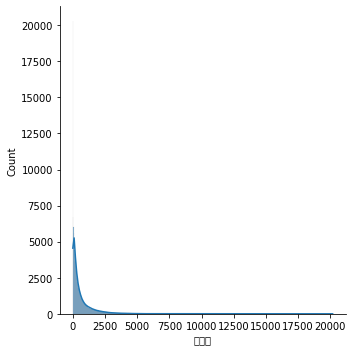

In [ ]:
%matplotlib inline
target = '투표수'
feature = train.columns.drop([target])
X_train = train[feature]
y_train = train[target]
y_train = y_train.apply(round)
sns.displot(y_train, kde=True);

In [ ]:
train

,시도명,구시군명,읍면동명,선거인수,대선후보,투표수,나이,정당지지도,대선후보 선호도
0,서울특별시,종로구,청운동,702.240,기호1번,60.1592,20,11.9,26.1
1,서울특별시,종로구,효자동,1937.848,기호1번,175.251,20,11.9,26.1
2,서울특별시,종로구,사직동,1398.419,기호1번,105.418,20,11.9,26.1
3,서울특별시,종로구,삼청동,657.932,기호1번,47.3712,20,11.9,26.1
4,서울특별시,종로구,부암동,1889.987,기호1번,130.326,20,11.9,26.1
...,...,...,...,...,...,...,...,...,...
10468,제주특별자치도,서귀포시,서홍동,2976.558,기호3번,572.088,50,14.0,17.0
10469,제주특별자치도,서귀포시,대륜동,4155.736,기호3번,849.448,50,14.0,17.0
10470,제주특별자치도,서귀포시,대천동,2816.970,기호3번,561.562,50,14.0,17.0
10471,제주특별자치도,서귀포시,중문동,3151.863,기호3번,631.56,50,14.0,17.0


In [ ]:
train.isnull().sum()

시도명         0
구시군명        0
읍면동명        0
선거인수        0
대선후보        0
투표수         0
나이          0
정당지지도       0
대선후보 선호도    0
dtype: int64

In [ ]:
a = train[train['투표수'] < np.percentile(train['투표수'], 100)]['투표수']
len(train['투표수']) ,len(a)


(126552, 126551)

In [ ]:
##################모델##############

In [ ]:
# !pip install -U scikit-learn
# !pip install category_encoders==2.*

In [ ]:
train = pd.concat([df_17_end,df_18_end,df_19_end])

In [ ]:
train.head()

In [ ]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train,test_size=0.2, random_state=10)

In [ ]:
target = '투표수'
feature = train.columns.drop([target])
X_train = train[feature]
y_train = train[target]
X_val = val[feature]
y_val = val[target]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder
pipe = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    LinearRegression(n_jobs=-1)
)

pipe.fit(X_train, y_train)

In [ ]:
print('검증세트 정확도', pipe.score(X_val, y_val))

In [ ]:
#########################교차검증###############################

In [ ]:
train = pd.concat([df_17_end,df_18_end,df_19_end])

In [ ]:
from category_encoders import OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from category_encoders import OrdinalEncoder

np.seterr(divide='ignore', invalid='ignore')

target = '투표수'
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]

pipe = make_pipeline(
    OrdinalEncoder(),  
    StandardScaler(), 
    Ridge(alpha=1.0)
)

k = 3
scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='r2')

print(f'r2 ({k} folds):', scores)

In [ ]:
scores.mean()

In [ ]:
scores.mean()

In [ ]:
#################읍동면명의 카디널리티가 높기때문에 제거 후 다시 검증 정확도 확인################

In [ ]:
target = '투표수'
feature = train.columns.drop([target,'읍면동명'])
X_train = train[feature]
y_train = train[target]
X_val = val[feature]
y_val = val[target]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder
pipe = make_pipeline(
    OneHotEncoder(),
    StandardScaler(),
    LinearRegression(n_jobs=-1)
)

pipe.fit(X_train, y_train)
print('검증세트 정확도', pipe.score(X_val, y_val))

In [ ]:
###########회귀 부스팅###########

In [ ]:
train = pd.concat([df_17_end,df_18_end,df_19_end])

from sklearn.model_selection import train_test_split

# train, val = train_test_split(train,test_size=0.2, random_state=10)

target = '투표수'
feature = train.columns.drop([target])
X_train = train[feature]
y_train = train[target]
# X_val = val[feature]
# y_val = val[target]

In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder
from sklearn.model_selection import cross_val_score
pipe = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    XGBRegressor(n_estimators=200,
                 objective='reg:squarederror'
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2)
)

pipe.fit(X_train, y_train)

k = 3
scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='r2')

print(f'r2 ({k} folds):', scores)